In [16]:
%matplotlib inline
#%matplotlib notebook
#TURN ABOVE LINE ON AND TOP ONE OFF TO PLOT ANIMATION
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os


In [17]:
#Set working directory
os.chdir("/path/to/working/directory")

In [18]:
#Load data into an astropy table
hdul = fits.open('auxil/ni6010080272.mkf')
data = hdul[1].data
data = Table(data)

In [19]:
#List Columns contained in mkf file
data.colnames

['TIME',
 'POSITION',
 'VELOCITY',
 'QUATERNION',
 'PNTUNIT',
 'POLAR',
 'RA',
 'DEC',
 'ROLL',
 'SAT_LAT',
 'SAT_LON',
 'SAT_ALT',
 'ELV',
 'BR_EARTH',
 'SUNSHINE',
 'TIME_SINCE_SUNSET',
 'FOV_FLAG',
 'SUN_ANGLE',
 'SUN_BODY_AZIMUTH',
 'BETA_ANGLE',
 'LOCAL_TIME',
 'MOON_ANGLE',
 'RAM_ANGLE',
 'EAST_ANGLE',
 'ANG_DIST',
 'SAA',
 'SAA_TIME',
 'COR_ASCA',
 'COR_SAX',
 'MCILWAIN_L',
 'MAGFIELD',
 'MAGFIELD_MIN',
 'MAG_ANGLE',
 'AP8MIN',
 'AE8MIN',
 'SUN_RA',
 'SUN_DEC',
 'MOON_RA',
 'MOON_DEC',
 'EARTH_RA',
 'EARTH_DEC',
 'TIME_ADJ',
 'ST_BBO',
 'ST_VALID',
 'ST_OBJECTS',
 'ST_VIDEO_VDC',
 'ATT_ANG_AZ',
 'ATT_ANG_EL',
 'RA_CMD',
 'DEC_CMD',
 'ATT_ERR_AZ',
 'ATT_ERR_EL',
 'ATT_STATE',
 'ATT_MODE',
 'ATT_SUBMODE_AZ',
 'ATT_SUBMODE_EL',
 'TARG_CMD',
 'PPS_SOURCE',
 'PPS_ERR_LOWPASS',
 'GPS_INIT',
 'GPS_CONVERGED',
 'NICER_SAA',
 'ST_STARS',
 'ST_FAILCODE',
 'TOT_ALL_COUNT',
 'TOT_UNDER_COUNT',
 'TOT_OVER_COUNT',
 'TOT_XRAY_COUNT',
 'FPM_ON',
 'NUM_FPM_ON',
 'FPM_DEADTIME',
 'FPM_RATIO_REJ_C

In [20]:
#Find times when NICER is on target
z_idx = []

for i in np.arange(0,len(data)):
    if (data['ATT_SUBMODE_AZ'][i]==2) and (data['ATT_SUBMODE_EL'][i]==2) and (data['ANG_DIST'][i]<0.004):#  and (data['TIME'][i]<299361111.0 #and (data['SUN_ANGLE'][i]>80): 
        z_idx.append(i)                                                                                     

In [21]:
len(z_idx)

4053

In [22]:
#Calculate exposure time for orbit day and night when NICER is on target
sun = []
no_sun = []
for i in np.arange(0,len(data)):
    if ((data['SUNSHINE'][i]==0) and data['ATT_SUBMODE_AZ'][i]==2) and (data['ATT_SUBMODE_EL'][i]==2) and (data['ANG_DIST'][i]<0.004):
        no_sun.append(i)
    elif ((data['SUNSHINE'][i]==1) and data['ATT_SUBMODE_AZ'][i]==2) and (data['ATT_SUBMODE_EL'][i]==2) and (data['ANG_DIST'][i]<0.004):
        sun.append(i)
        
print(f'Exposure During Orbit Day:{len(sun)} s, Exposure During Orbit Night:{len(no_sun)} s')

Exposure During Orbit Day:2461 s, Exposure During Orbit Night:1592 s


Text(0, 0.5, 'FPM_UNDERONLY_COUNT')

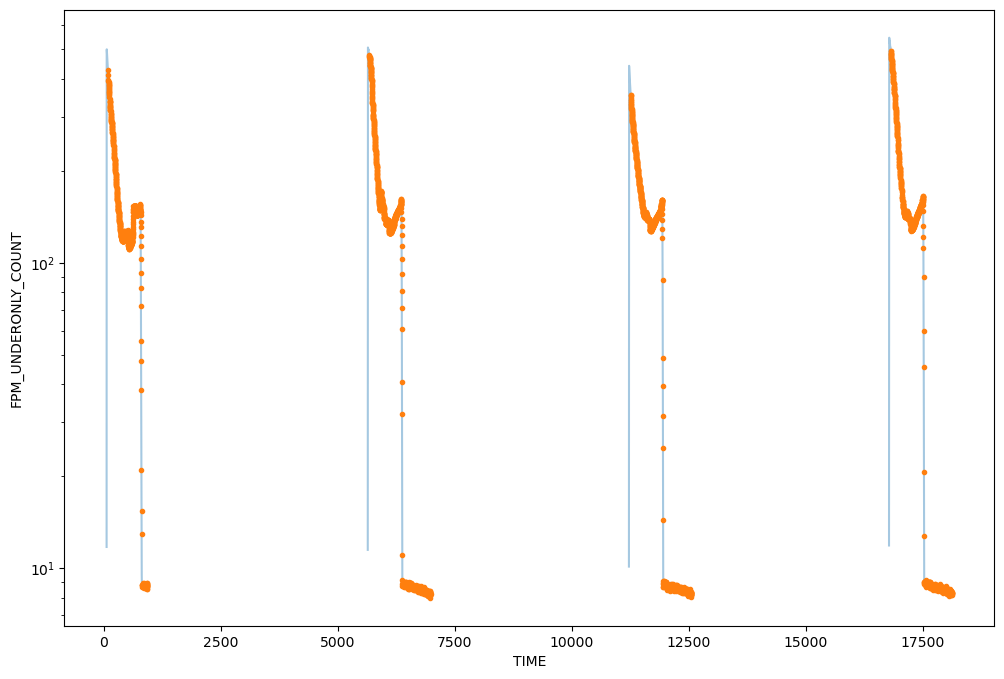

In [23]:
#Plotting various columns in the MKF file. 
plt.figure(figsize=(12,8))
plt.yscale('log')
plt.plot(data['TIME']-data['TIME'][0],data['FPM_UNDERONLY_COUNT'],alpha=0.4)
plt.plot(data['TIME'][z_idx]-data['TIME'][0],data['FPM_UNDERONLY_COUNT'][z_idx],linestyle='None',marker='.')
plt.xlabel('TIME')
plt.ylabel('FPM_UNDERONLY_COUNT')


Text(0, 0.5, 'FPM_OVERONLY_COUNT')

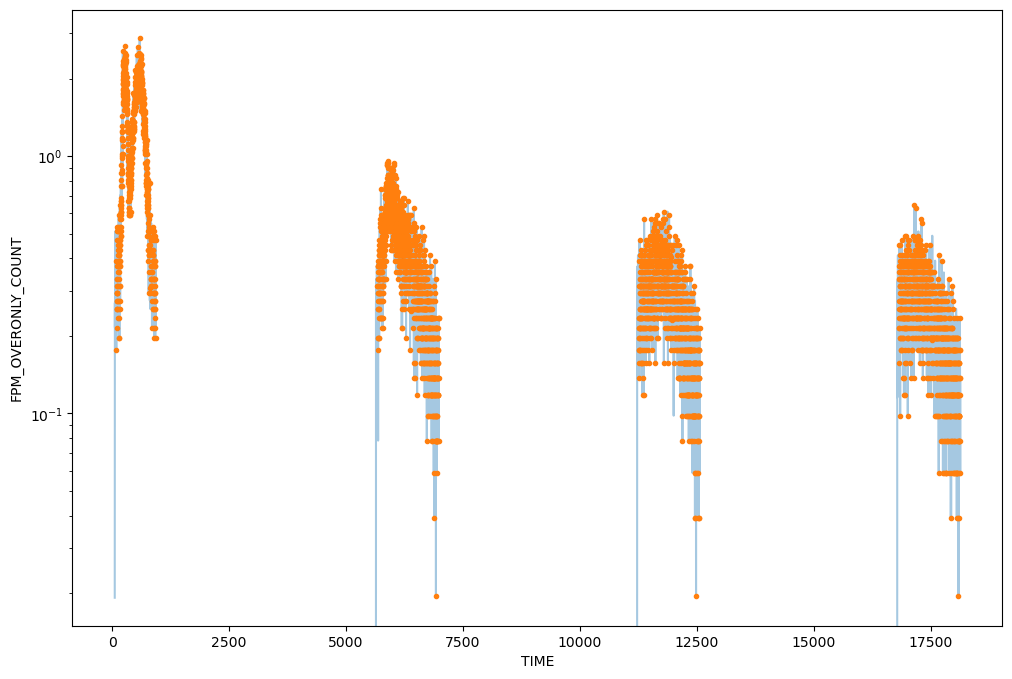

In [24]:
plt.figure(figsize=(12,8))
plt.yscale('log')
plt.plot(data['TIME']-data['TIME'][0],data['FPM_OVERONLY_COUNT'],alpha=0.4)
plt.plot(data['TIME'][z_idx]-data['TIME'][0],data['FPM_OVERONLY_COUNT'][z_idx],linestyle='None',marker='.')
plt.xlabel('TIME')
plt.ylabel('FPM_OVERONLY_COUNT')

Text(0, 0.5, 'ELV')

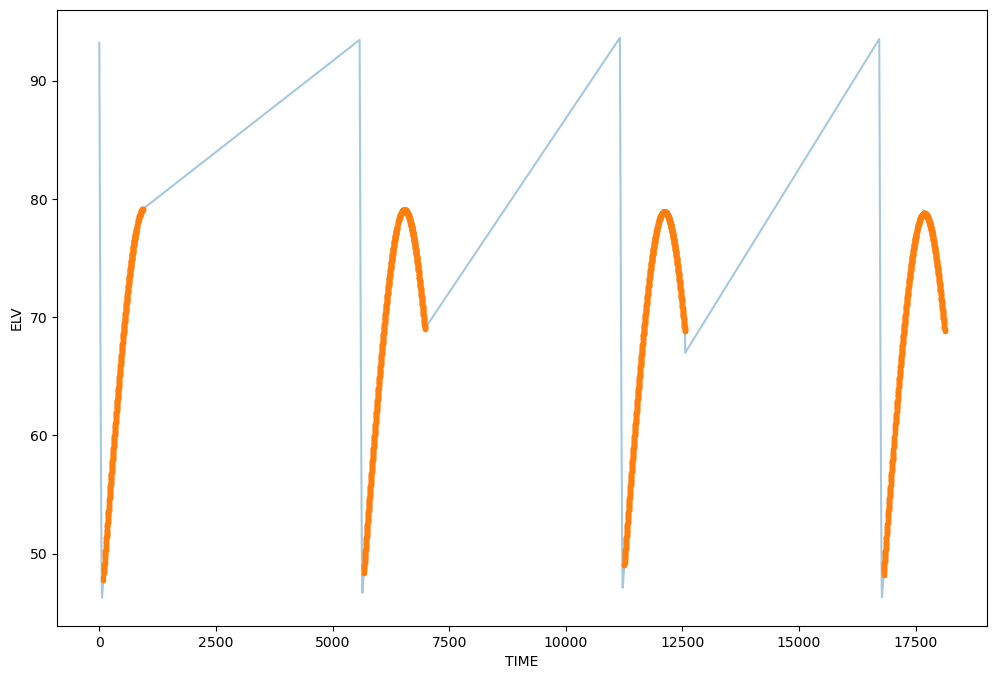

In [25]:
plt.figure(figsize=(12,8))
plt.plot(data['TIME']-data['TIME'][0],data['ELV'],alpha=0.4)
plt.plot(data['TIME'][z_idx]-data['TIME'][0],data['ELV'][z_idx],linestyle='None',marker='.')
plt.xlabel('TIME')
plt.ylabel('ELV')

Text(0, 0.5, 'SUN_ANGLE')

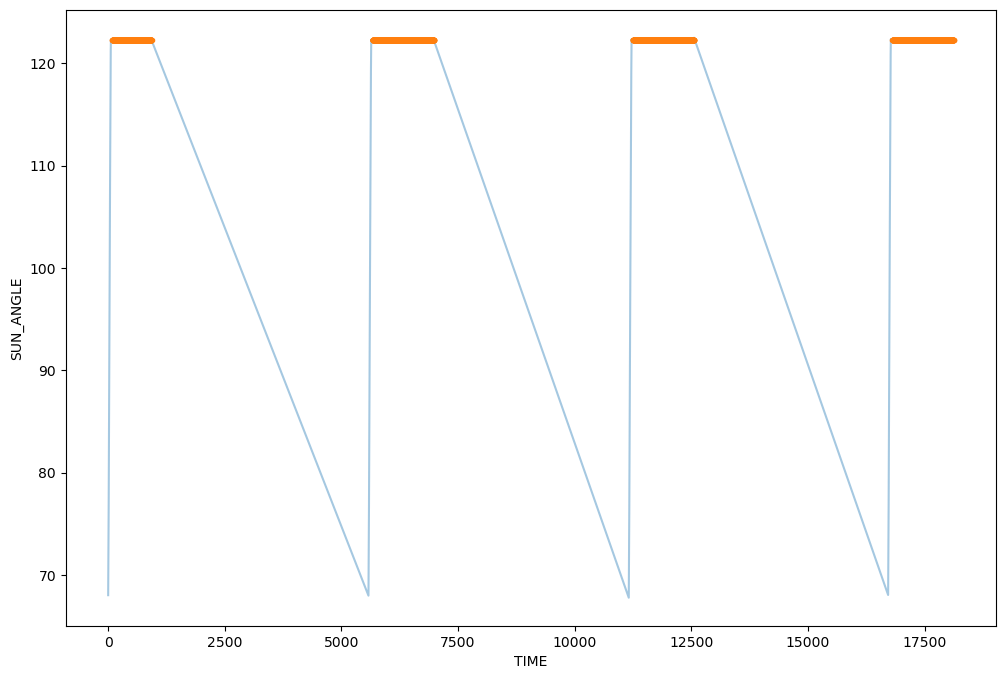

In [26]:
plt.figure(figsize=(12,8))
plt.plot(data['TIME']-data['TIME'][0],data['SUN_ANGLE'],alpha=0.4)
plt.plot(data['TIME'][z_idx]-data['TIME'][0],data['SUN_ANGLE'][z_idx],linestyle='None',marker='.')
plt.xlabel('TIME')
plt.ylabel('SUN_ANGLE')

Text(0, 0.5, 'SUNSHINE')

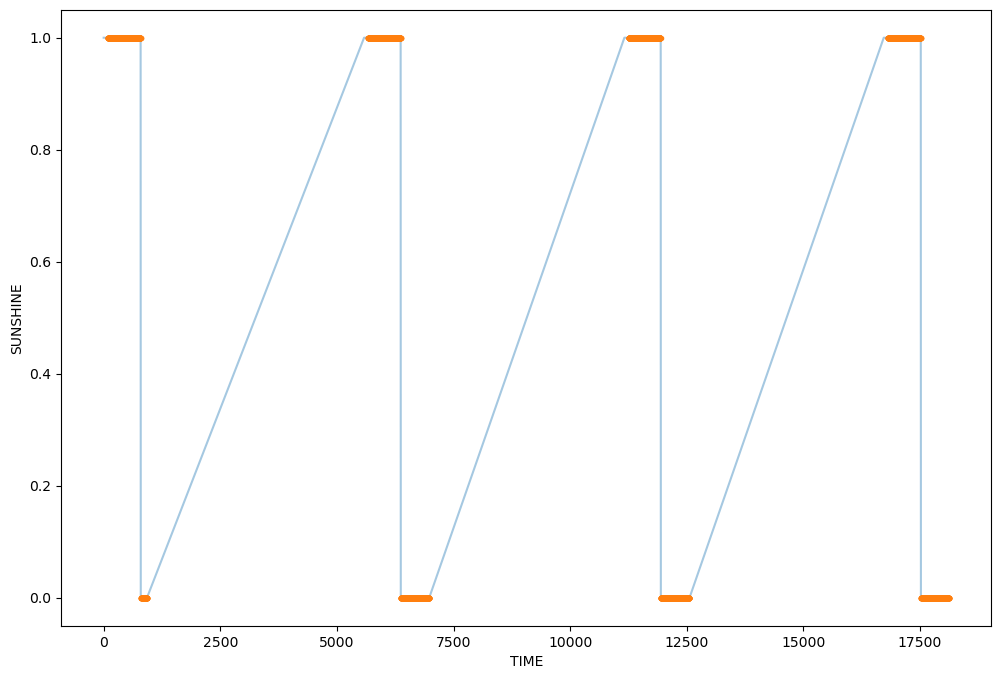

In [27]:
plt.figure(figsize=(12,8))
plt.plot(data['TIME']-data['TIME'][0],data['SUNSHINE'],alpha=0.4)
plt.plot(data['TIME'][z_idx]-data['TIME'][0],data['SUNSHINE'][z_idx],linestyle='None',marker='.')
plt.xlabel('TIME')
plt.ylabel('SUNSHINE')

Text(0, 0.5, 'NICER_SAA')

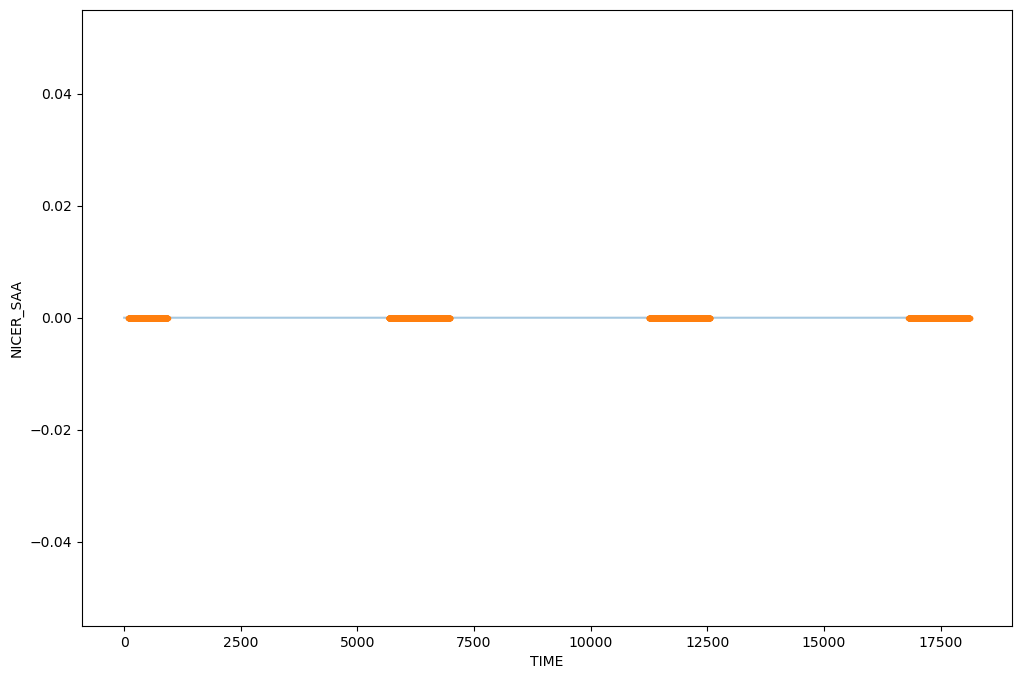

In [28]:
plt.figure(figsize=(12,8))
plt.plot(data['TIME']-data['TIME'][0],data['NICER_SAA'],alpha=0.4)
plt.plot(data['TIME'][z_idx]-data['TIME'][0],data['NICER_SAA'][z_idx],linestyle='None',marker='.')
plt.xlabel('TIME')
plt.ylabel('NICER_SAA')

Text(0, 0.5, 'FPM_NOISERING_COUNT')

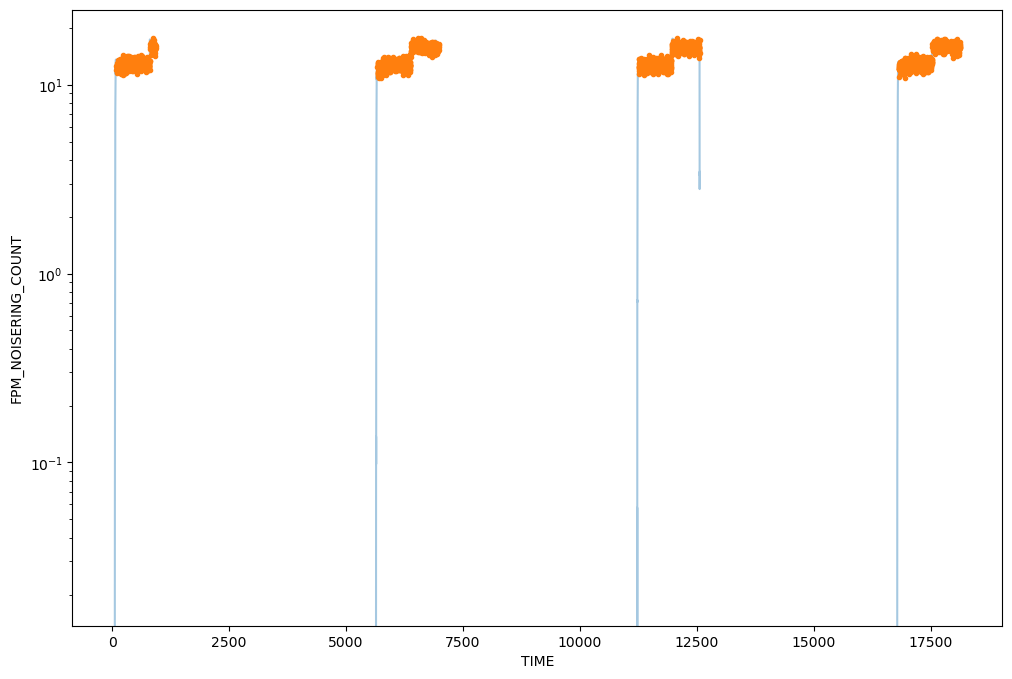

In [29]:
plt.figure(figsize=(12,8))
plt.yscale('log')
plt.plot(data['TIME']-data['TIME'][0],data['FPM_NOISERING_COUNT'],alpha=0.4)
plt.plot(data['TIME'][z_idx]-data['TIME'][0],data['FPM_NOISERING_COUNT'][z_idx],linestyle='None',marker='.')
plt.xlabel('TIME')
plt.ylabel('FPM_NOISERING_COUNT')

Text(0, 0.5, 'MPU_LOWMEM_SCI_DELTA')

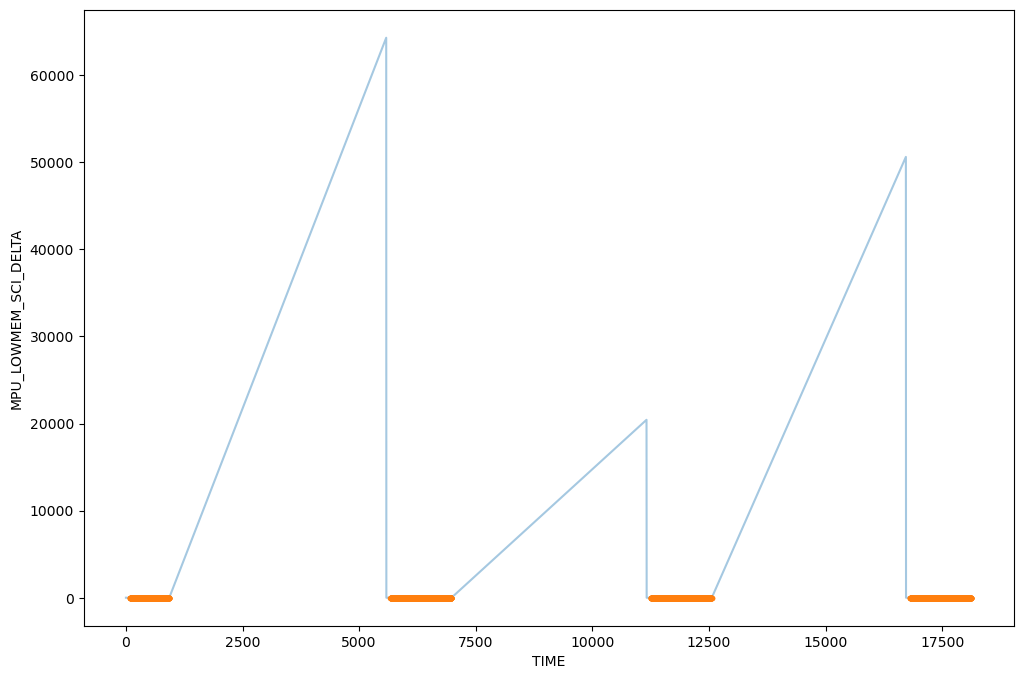

In [30]:
lowmem_sci_delta = [sum(sublist) for sublist in data['MPU_LOWMEM_SCI_DELTA']]
lowmem_sci_delta_obs = [sum(sublist) for sublist in data['MPU_LOWMEM_SCI_DELTA'][z_idx]]

plt.figure(figsize=(12,8))

plt.plot(data['TIME']-data['TIME'][0],lowmem_sci_delta,alpha=0.4)
plt.plot(data['TIME'][z_idx]-data['TIME'][0],lowmem_sci_delta_obs,linestyle='None',marker='.')
plt.xlabel('TIME')
plt.ylabel('MPU_LOWMEM_SCI_DELTA')


Text(0, 0.5, 'DELTA_SLOW_LLD')

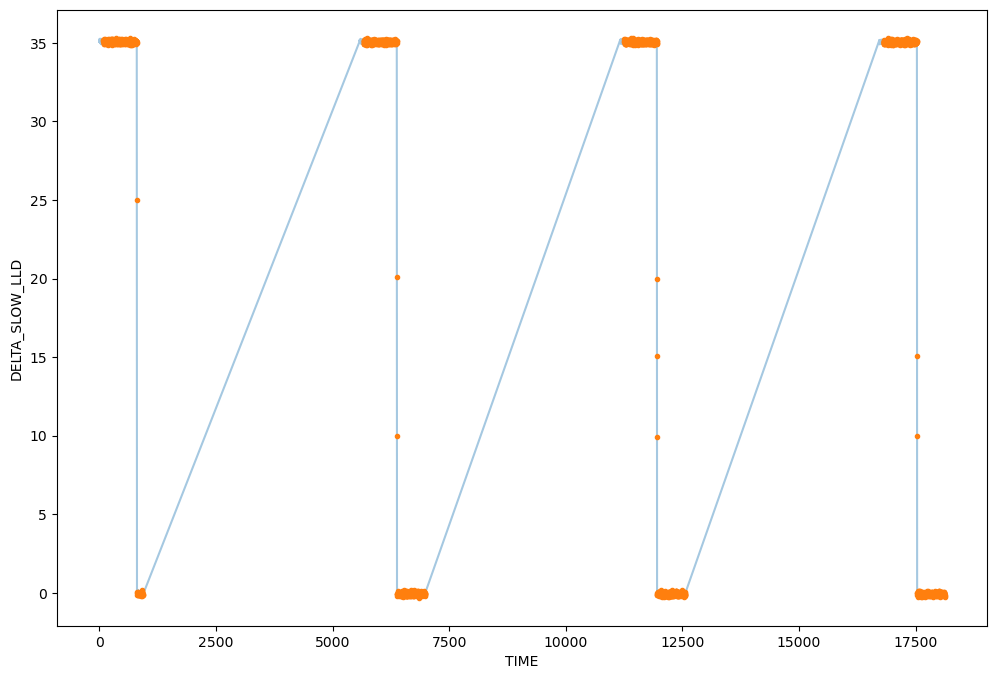

In [31]:
plt.figure(figsize=(12,8))
plt.plot(data['TIME']-data['TIME'][0],data['DELTA_SLOW_LLD'],alpha=0.4)
plt.plot(data['TIME'][z_idx]-data['TIME'][0],data['DELTA_SLOW_LLD'][z_idx],linestyle='None',marker='.')
plt.xlabel('TIME')
plt.ylabel('DELTA_SLOW_LLD')